In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm # Untuk progress bar

In [16]:
DATASET_DIR = "../ImagesDataset/"     
PREPROCESSED_DIR = "../ProcessedImages/"
TARGET_SIZE = (3000, 4000)

In [3]:
os.makedirs(PREPROCESSED_DIR, exist_ok=True)

In [4]:
# --- Fungsi Helper ---

def load_image_paths(directory):
    """Memuat semua path gambar dari direktori."""
    image_paths = []
    valid_extensions = {".jpg", ".jpeg", ".png", ".bmp"}
    
    # os.walk akan secara otomatis masuk ke subfolder "cerah", "tidakRata", "gelap"
    # [cite_start]Sesuai dengan 3 kategori di PPT Anda [cite: 55, 56, 57]
    for root, _, files in os.walk(directory):
        for file in files:
            if os.path.splitext(file)[1].lower() in valid_extensions:
                image_paths.append(os.path.join(root, file))
    print(f"Total {len(image_paths)} gambar ditemukan.")
    return image_paths

def plot_comparison(img_original, img_processed, title_original="Original", title_processed="Processed"):
    """Menampilkan perbandingan dua gambar."""
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    
    axes[0].imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
    axes[0].set_title(f"{title_original} (Shape: {img_original.shape})")
    axes[0].axis("off")
    
    axes[1].imshow(cv2.cvtColor(img_processed, cv2.COLOR_BGR2RGB))
    axes[1].set_title(f"{title_processed} (Shape: {img_processed.shape})")
    axes[1].axis("off")
    
    plt.tight_layout()
    plt.show()

In [ ]:
# --- Fungsi Preprocessing ---

def resize_image(image, size):
    """Me-resize gambar ke ukuran target."""
    return cv2.resize(image, size, interpolation=cv2.INTER_AREA)

def denoise_image(image):
    """
    Menerapkan filter denoising.
    Saat ini menggunakan Non-Local Means.
    
    """
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

--- Menjalankan Eksplorasi (1 Contoh) ---
Total 45 gambar ditemukan.
Memproses contoh: ../ImagesDataset/Foto Kondisi Gelap\20251016_180732.png


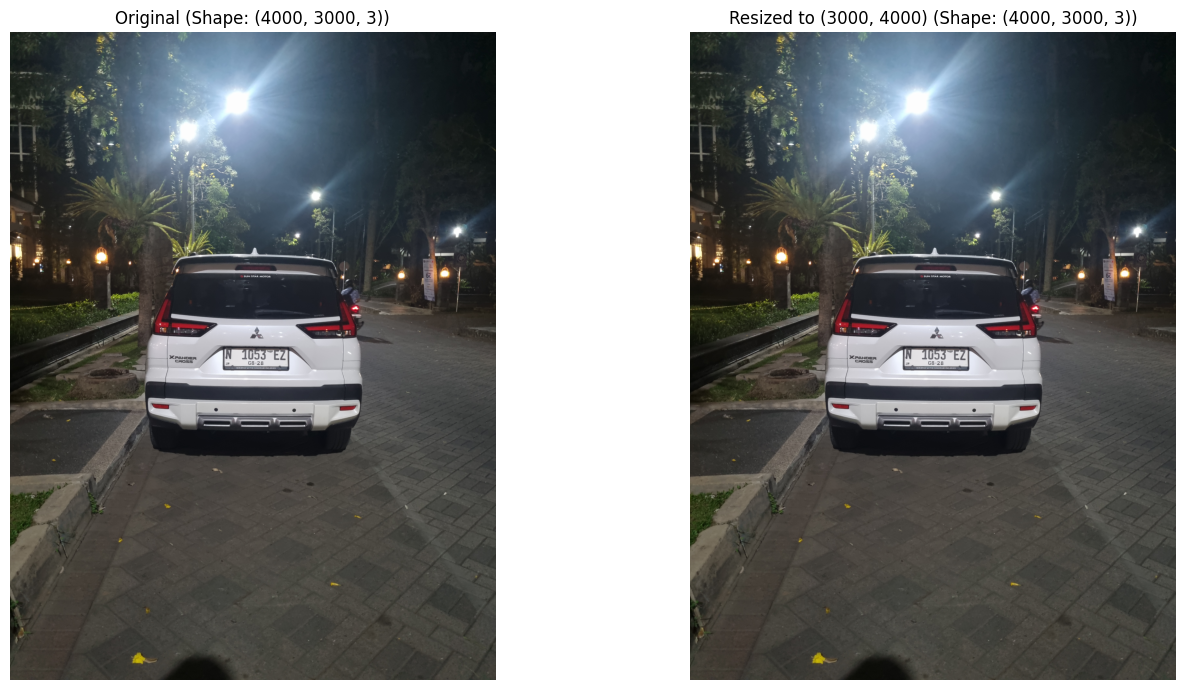

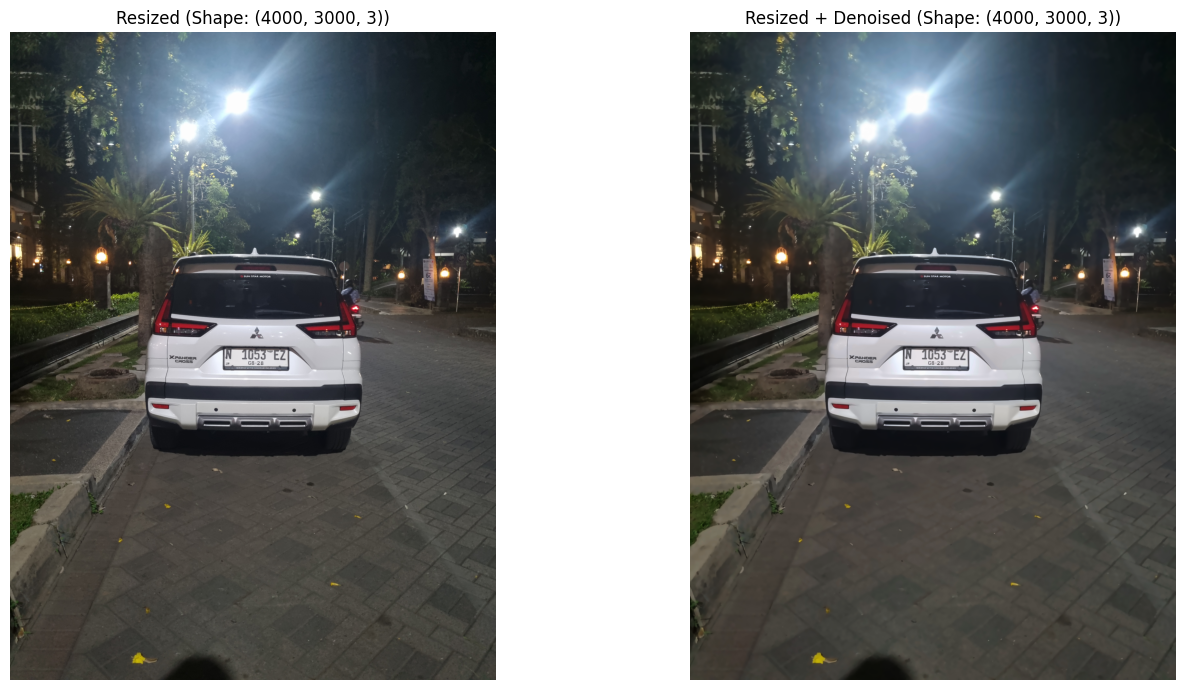

In [22]:
# --- 1. Eksplorasi Data (Contoh 1 Gambar) ---
print("--- Menjalankan Eksplorasi (1 Contoh) ---")
image_paths = load_image_paths(DATASET_DIR)

if image_paths:
    # Ambil 1 contoh gambar
    sample_path = image_paths[random.randint(0, len(image_paths) - 1)]
    original_img = cv2.imread(sample_path)
    
    if original_img is not None:
        print(f"Memproses contoh: {sample_path}")
        
        # Langkah 1: Resize 
        resized_img = resize_image(original_img, TARGET_SIZE)
        plot_comparison(original_img, resized_img, "Original", f"Resized to {TARGET_SIZE}")
        
        # Langkah 2: Denoising 
        # [cite_start]Kita denoise gambar yang sudah di-resize, sesuai alur di PPT [cite: 82, 93]
        denoised_img = denoise_image(resized_img)
        plot_comparison(resized_img, denoised_img, "Resized", "Resized + Denoised")
        
    else:
        print(f"Gagal memuat gambar: {sample_path}")

In [23]:
# --- 2. Batch Processing (Proses & Simpan Semua Gambar) ---
print("\n--- Menjalankan Batch Processing (Semua Gambar) ---")
processed_count = 0
if not image_paths:
    print("Tidak ada gambar untuk diproses. Periksa folder DATASET_DIR.")
else:
    for path in tqdm(image_paths, desc="Preprocessing Gambar"):
        try:
            # Muat gambar
            img = cv2.imread(path)
            if img is None:
                print(f"Warning: Gagal memuat {path}, dilewati.")
                continue
                
            # Langkah 1: Resize
            img_resized = resize_image(img, TARGET_SIZE)
            
            # Langkah 2: Denoise
            img_denoised = denoise_image(img_resized)
            
            # --- PERUBAHAN UTAMA DI SINI ---
            
            # 1. Dapatkan path relatif (misal: "cerah/foto1.jpg")
            relative_path = os.path.relpath(path, DATASET_DIR)
            
            # 2. Buat path output lengkap (misal: "ProcessedImages/cerah/foto1.jpg")
            output_path = os.path.join(PREPROCESSED_DIR, relative_path)
            
            # 3. Dapatkan direktori output (misal: "ProcessedImages/cerah/")
            output_dir_for_image = os.path.dirname(output_path)
            
            # 4. Buat subfolder ("cerah", "tidakRata", "gelap") jika belum ada
            os.makedirs(output_dir_for_image, exist_ok=True)
            
            # --- AKHIR PERUBAHAN ---
            
            # Simpan gambar
            cv2.imwrite(output_path, img_denoised)
            processed_count += 1
            
        except Exception as e:
            print(f"Error memproses {path}: {e}")

    print(f"\nSelesai! {processed_count} gambar telah di-resize, di-denoise, dan disimpan di: {PREPROCESSED_DIR}")


--- Menjalankan Batch Processing (Semua Gambar) ---


Preprocessing Gambar: 100%|██████████| 45/45 [07:40<00:00, 10.23s/it]


Selesai! 45 gambar telah di-resize, di-denoise, dan disimpan di: ../ProcessedImages/
